# Analysis of Driving Behavior and Conditions
## Introduction
#### Investigation
Using the data provided, investigate the driving behavior of the driver, the driving conditions and highlight (if any) interesting events recorded by the device. What driving situation might have occurred at the respective time? How would you best represent these events to a customer (for example to the management of a commercial fleet company in the event one of the drivers showed this behavior)?
#### Datasets
1. Location
2. Object Recognition
3. Acceleration
4. Gyroscope (angular velocity)
#### Table of Contents:
1. Analyzing Location Data
2. Analyzing Gyroscope and Acceleration Data
3. Analyzing Object Recognition Data
4. Conclusion

## Part 1: Analyzing Location Data

Exploring and mapping the GPS dataset to view the travel location of the car.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# Uploading data
df_gps = pd.read_csv('../data/gps/rec_1637851029.gps.csv')
df_gps

,Latitude,Longitude,Altitude,Speed,HorizontalAccuracy,VerticalAccuracy,SpeedAccuracy,ts
0,52.692229,13.295218,92.728551,7.356135,5.640,3.0,2.022498,1637851030813909707
1,52.692293,13.295196,92.731630,7.732341,5.926,3.0,1.819505,1637851031810765796
2,52.692364,13.295174,92.778681,7.082715,6.303,3.0,1.436001,1637851032810525062
3,52.692440,13.295157,92.760099,8.354374,6.527,3.0,1.503330,1637851033814644381
4,52.692508,13.295141,92.783514,7.302135,7.142,3.0,1.710585,1637851034813340574
5,52.692575,13.295121,92.805511,7.348260,7.044,3.0,1.077126,1637851035812816299
6,52.692635,13.295101,92.802535,6.475917,6.979,3.0,1.378876,1637851036813460617
7,52.692694,13.295075,92.786832,7.781188,6.759,3.0,1.672423,1637851037812010404
8,52.692769,13.295044,92.800259,7.951618,6.672,3.0,2.180573,1637851038810190660
9,52.692848,13.295010,92.825914,9.056462,6.376,3.0,1.724094,1637851039814193260


#### Mapping Car Location
Mapping the location of vehicle movement using the car's latitude and longitude points to visualize its location on Google Maps.

(See image **map.png** or interactive map **map.html** in **plots** folder).

In [10]:
import gmplot

# Array of latitude, longitude, and speed
latitude_list = df_gps.Latitude.to_numpy()
longitude_list = df_gps.Longitude.to_numpy()

# Pass in latitude and longtitude for center
gmap = gmplot.GoogleMapPlotter(df_gps.Latitude.mean(),df_gps.Longitude.mean(), 20)
  
# Scatter points on the Google Map
gmap.scatter(latitude_list, longitude_list, "#00008B", size=1.5, marker=False)
  
# Draw a line in between given coordinates
gmap.plot(latitude_list, longitude_list, 'lightblue', edge_width = 2.5)

gmap.draw( "map.html" )

![Alt text](../plots/map.png)

**Findings:**
- The car is entering and exiting a 4-way roundabout
- The roundabout is located in southeastern Berlin, Germany
- Since the first row in the dataset correlates with the most southern point, the car is driving North on Am Möllenberg and leaving the second exit in the roundabout, continuing on the same street

#### Mapping Car Location and Speed
Plotting the speed of the car on the same map, with green representing a high speed, blue representing medium, and purple representing a slower speed.

(See image **map_speed.png** or interactive map **map_speed.html** in the **plots** folder).

In [11]:
import gmplot
import math

# Convert number to hex value
def num_to_hex(val, max_val=13):
    i = (val * 255 / max_val)
    r = round(math.sin(0.024 * i + 0) * 127 + 128)
    g = round(math.sin(0.024 * i + 2) * 127 + 128)
    b = round(math.sin(0.024 * i + 4) * 127 + 128)
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

# Array of latitude, longitude, and speed
latitude_list = df_gps.Latitude.to_numpy()
longitude_list = df_gps.Longitude.to_numpy()
speed_list = df_gps.Speed.to_numpy()

# Create list of hex colors representing speed
hex_list = []
for i in speed_list:
    hex_list.append(num_to_hex(i))


# Pass in latitude and longtitude for center
gmap3 = gmplot.GoogleMapPlotter(df_gps.Latitude.mean(),df_gps.Longitude.mean(), 20)
  
# Scatter points on the Google Map
gmap3.scatter(latitude_list, longitude_list, hex_list, size=1.5, marker=False)
  
# Draw a line in between given coordinates
gmap3.plot(latitude_list, longitude_list, 'lightblue', edge_width = 2.5)

gmap3.draw( "map_speed.html" )

![Alt text](../plots/%20map_speed.png)

**Findings:**

- The quick transition from the southern-most green point to a darker blue one at the entrance of the roundabout illustrates that the vehicle quickly decelerates as it approaches the roundabout
- The driver then continues to slow down as they turn in the roundabout, since the dark blue dots appear more purple as it curves to the right
- At the exit of the roundabout, because the point becomes dark blue once more, we can assume that the driver slowly accelerated the car because the turn is over

#### Plotting speed of car over time
Visualizing the speed of car over time.

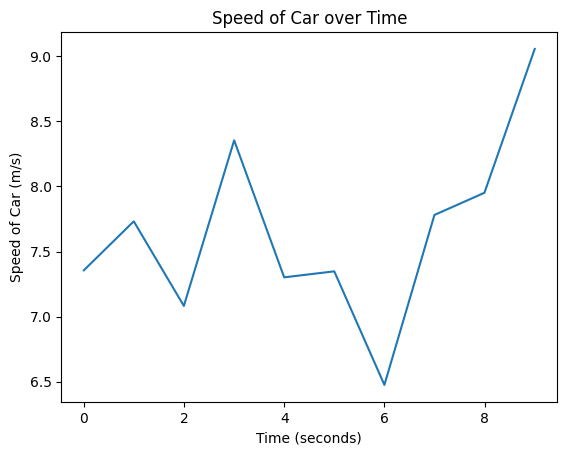

In [12]:
# Created new column that converts nanoseconds to seconds for more readability
df_gps['ts_sec'] = (df_gps['ts'] - df_gps['ts'].iloc[0])/1e+9

# Plotting speed of car over time
plt.plot(df_gps['ts_sec'], df_gps['Speed'])
plt.ylabel('Speed of Car (m/s)')
plt.xlabel('Time (seconds)')
plt.title('Speed of Car over Time')
plt.show()

**Findings**
- Quick deceleration at the beginning of the period (around the first 2 seconds) when it enters the roundabout
- Small increase in speed around 3 seconds
- Gradual acceleration toward the end, where we determined that it exits the roundabout

## Part 2: Analyzing Gyroscope and Acceleration Data

Looking at gyroscope and accelerometer datasets (GYS and ACL, respectively) to better understand the movement of the car in the given period.

Created a new column **ts_sec** for both datasets to match the driving time to that in the GPS dataset, and convert the time to seconds for more readability.

In [14]:
# Upload data
df_gys = pd.read_csv('../data/1637851029/rec_1637851029.gyr.csv')
df_acl = pd.read_csv('../data/1637851029/rec_1637851029.acl.csv')

# Create new column for time in seconds
df_gys['ts_sec'] = (df_gys['ts'] - df_gps['ts'].iloc[0])/1e+9
df_acl['ts_sec'] = (df_acl['ts'] - df_gps['ts'].iloc[0])/1e+9

#### Plotting Gyroscope Axiis
To better understand the angular velocity movement across the X, Y, and Z planes.

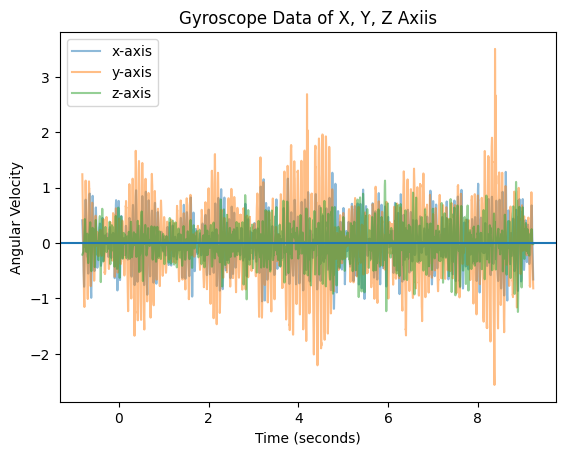

In [15]:
# Plot gyroscope axiis
plt.plot(df_gys['ts_sec'], df_gys['x'], alpha=0.5, label='x-axis')
plt.plot(df_gys['ts_sec'], df_gys['y'], alpha=0.5, label='y-axis')
plt.plot(df_gys['ts_sec'], df_gys['z'], alpha=0.5, label='z-axis')
plt.axhline(y=0)
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Angular Velocity')
plt.title('Gyroscope Data of X, Y, Z Axiis')
plt.show()

**Findings:**
- The blue line, which measure angular velocity of the x axis, demonstrates the car's slight turn to the right from time 0 to 3.5 (since the numbers are negative), and large turn to the left from time 3.5 to 8, before performing another slight turn to the right from time 8 to 9.
- The orange and green lines, which measure angular velocity of the y and z axiis respectively, show intense fluctuations around time 0, 3.5, and 9. This is potentially correlated with the change of direction the car is experiencing as inferred in the blue line.

#### Plotting Acceleration Axiis
To better understand the acceleration movement across the X, Y, and Z planes.

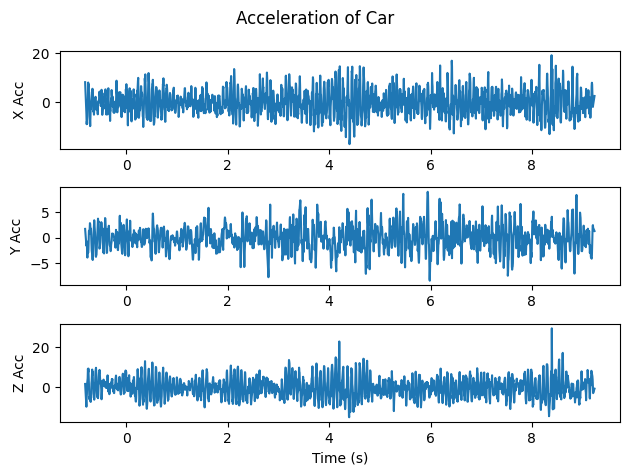

In [16]:
# Plot Acceleration Axiis
fig, ax = plt.subplots(3, 1)
ax[0].plot(df_acl['ts_sec'], df_acl['x'])
ax[1].plot(df_acl['ts_sec'], df_acl['y'])
ax[2].plot(df_acl['ts_sec'], df_acl['z'])
fig.suptitle("Acceleration of Car")
ax[0].set_ylabel("X Acc")
ax[1].set_ylabel("Y Acc")
ax[2].set_ylabel("Z Acc")
ax[2].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()

**Findings**
- The second graph demonstrates a sharp increase in acceleration on the y-axis around the 3.5-second mark, before gradually decreasing until the 8-second perod. This illustrates the car's movement towards the left direction as it makes its turn around the roundabout.
- The first and third graph demonstrates intense fluctuations at the same 3.5-second mark, likely because the x and z axiis's accelerations are also affected by the change in turn direction.

#### Calculating & Plotting Net Acceleration
Net Acceleration = Square root of the sum of the squares of the component accelerations

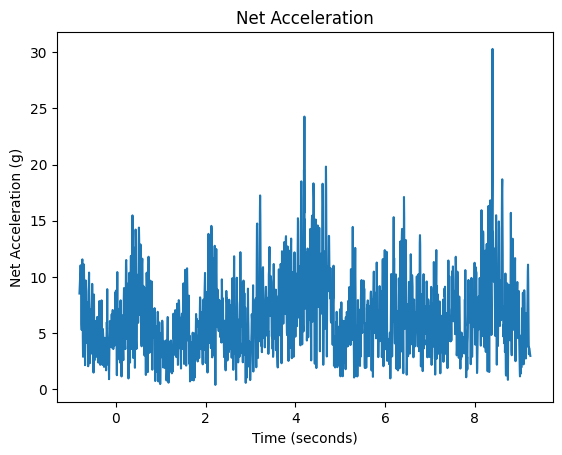

In [17]:
# Calculate net acceleration of car
sum = df_acl['x']**2 + df_acl['y']**2 + df_acl['z']**2
df_acl['net'] = sum.apply(math.sqrt)

# Plot net acceleration of car
plt.plot(df_acl['ts_sec'], df_acl['net'])
plt.ylabel('Net Acceleration (g)')
plt.xlabel('Time (seconds)')
plt.title('Net Acceleration')
plt.show()

**Findings**
- The sharp rise in acceleration at the 0, 4, and 8 second marks can potentially be explained by the change in direction the car is experiencing during those times.
- Even though the net acceleration is very high around the 4-second mark, the number is affected by both positive and negative acceleration. This means that the driver might have stepped on the break and slowed down the car at the time, decelerating the car to make the turn.

## Part 3: Analyzing Object Recognition Data

Looking at the object recognition dataset (DES) to better understand the surrounding of the car.
Creating a dataframe **objs** with values where ClassID is not null to select times where the device recognizes an object in front of the car.

In [18]:
# Read dataset
df_des = pd.read_csv('../data/1637851029/rec_1637851029.sce_des.csv')
# Change time from nanoseconds to seconds
df_des['ts_sec'] = (df_des['ts'] - df_gps['ts'].iloc[0])/1e+9

# Create dataframe where ClassID is not NaN
objs = df_des.dropna(axis=0, subset='ClassID')
# Label map
label_map = {
    0: 'Person',
    1: 'Bicycle',
    2: 'Car',
    3: 'Motorcycle',
    4: 'Bus',
    5: 'Train',
    6: 'Truck',
    7: 'Traffic Light',
    8: 'Moving Object',
    9: 'Non Speed Sign',
    10: 'Right Of Way',
    11: 'Stop Sign',
    12: 'Speed Sign',
    13: 'Four Legs Animals',
    14: 'Cone',
    15: 'Construction Pole',
    16: 'Blockages',
    17: 'Construction Signs',
    18: 'Wheel',
    19: 'License Plate',
    20: 'Face'
}
# Change ClassID to name of object
objs = objs.replace({"ClassID": label_map})

#### Visualizing objects and X-Axis Acceleration

Discovering if the car's surrounding objects changed the way it turned.

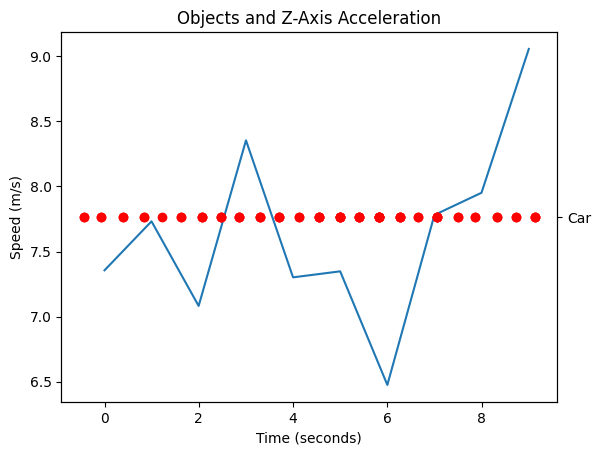

In [19]:
# Plot Object and Z-Axis Acceleration
fig, ax = plt.subplots()
ax.plot(df_gps['ts_sec'], df_gps['Speed'])
ax2 = ax.twinx()
ax2.scatter(objs['ts_sec'], objs['ClassID'], color='r')
plt.title('Objects and Z-Axis Acceleration')
ax.set_ylabel('Speed (m/s)')
ax.set_xlabel('Time (seconds)')
plt.show()

**Findings**
- There was another car in front of the vehicle around the 0-second mark but disappears around the 1-second mark. The car potentially switched direction and left the frame of the device.
- There is a traffic light around the -0.5-second mark, on the street before the car heads into the roundabout.
- There are two people around the car as the car heads into the roundabout at the 1-second mark.
- A truck appears in front of the vehicle around the 4-second mark, when the driver passes the first exit of the intersection (see map.png). Perhaps the trucks were entering through the same street.
- The car slows down around the 4-second mark, potentially because of the truck that comes into view.
- A car appears around the 9-second mark when the car exits the roundabout.

#### Visualizing the Surrounding Objects

Visualizing the bounding box of the object on the device.

The more opaque a rectangle is, the ealier it appears on the image. The more transparent a rectangle is, the later it appears.

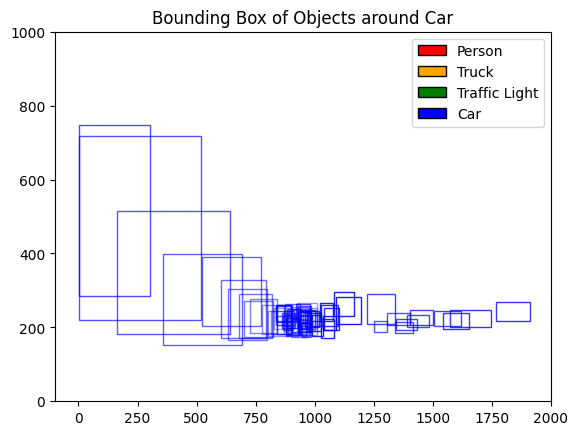

In [20]:
from matplotlib.patches import Rectangle, Patch

# Create color map for different objects
color_map = {'Person': 'red', 'Truck': 'orange', 'Traffic Light': 'green', 'Car': 'blue'}

# Normalize time to be between 0.5 and 1 for alpha argument later
min_val = objs['ts_sec'].min()
max_val = objs['ts_sec'].max()
# Define a normalization function
def normalize(x):
    return (x - min_val) / (max_val - min_val) * 0.5 + 0.4
objs['time'] = objs['ts_sec'].apply(normalize)

# Plot rectangles
fig, ax = plt.subplots()
rect_handles = []
for category, color in color_map.items():
    rect_handles.append(Patch(facecolor=color, edgecolor='black', label=category)) # Creates rectangle handle
    subset_df = objs[objs['ClassID'] == category]
    for _, row in subset_df.iterrows():
        rect = Rectangle((row['Left'], row['Top']), row['Width'], row['Height'], color=color, fill=False, alpha=row['time'])
        ax.add_patch(rect)
# Set boundaries for plot
ax.set_xlim(-100, 2000)
ax.set_ylim(0, 1000)
ax.legend(handles=rect_handles) # show legend

plt.title('Bounding Box of Objects around Car')
plt.show()

**Findings**
- The first car appears to be shrinking. This potentially illustrates the car speeding up and becoming too small to be detected.
- The person appears to become larger as the largest red rectangle is more translucent than the smaller ones. This means that the person is approaching the car.
- The truck appears to be shrinking because the smaller yellow rectangles are less opaque, meaning the truck is moving away from the car.

## Conclusion

#### Presenting Findings

Through analyzing the location, gyroscope, accelerator, and object recognition data, we can conclude that the car is travelling North on Am Möllenberg Street in Berlin, Germany. It is entering a roundabout and leaving at the second exit.

In this process, it slows down and makes a slight right turn around as it enters the roundabout, before decelerating more to change direction and turn left to follow the way of the roundabout around the 4-second mark. It then turns slightly right to exit the roundabout and speeding up once more.

It first passes a traffic light and a person as it enters the roundabout. At the first exit of the roundabout, a truck then comes into view.

The data demonstrates that the driver carefully slowed down as they entered and turned in the roundabout, as well as when a truck came into view, illustrating safe driving practices.

#### Future Analysis

For future analysis, one can look at the correlation between y-axis gyroscope and object recognition data to visualize the relationship between how the car turns with regards to objects on the road. Another point of analysis is illustrating the relationship between x-axis and z-axis gyroscope data to make sense of the intense fluctuations around the 4-second mark.